# NLP_Project : Question&Response

 - developer : imhamed boujemaa 
 - Class : RAIA 

## Objective : 

The objective of this notebook is to demonstrate a simple question-answering system using natural language processing techniques. 
The system uses a dataset of frequently asked questions and their corresponding answers (Article) to find the closest match to a given question and return the corresponding answer. The system is based on the TF-IDF algorithm and cosine similarity measure for text matching, and the NLTK library for text preprocessing and tokenization. 

### import libraries 

In [100]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import nltk
import string

In [101]:
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk import pos_tag
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

## Explanation :

 - word_tokenize : it's a function from NLTK library to divise the text on words also called tokens
 
 - WordNetLemmatizer : it's a function to perform word lemmatization, that is to reduce words to their canonical form (lemma)
 
 - stopwords : import the list of s_w, s_w are very frequent and usually insignifcant words which can be removed form the text during data preparation.
 
 - wordnet : is a lexical database that contains synonyms, antonyms and semantic relationships between words.
 
 - pos_tag : it's a function to label the part of speech (POS) of each word in the text.
 
 - TfidVectorize : it's a class form scikit-learn library, is a common text vectorization technique in NLP that transform text into digital feature vectors.
 
 - cosine_similarity : Objectif : to calculate the cosine similarity between two vectors, this function is often used in QA models to calculate the similarity between the user's question and the possible answers.
 
 

### import data

 - importing 3 files of data 
 - we use the tab separator as a field separator "\t" , beacause as default is ";" , in our data we have ";"
 - df3 also uses the 'ISO-8859-1' encoding to read the CSV file, as this file may contain non-ASCII characters that cannot be read with the default 'utf-8' encoding.

In [102]:
df1 = pd.read_csv('S08_question_answer_pairs.txt', sep='\t')
df2 = pd.read_csv('S09_question_answer_pairs.txt', sep='\t')
df3 = pd.read_csv('S10_question_answer_pairs.txt', sep='\t', encoding = 'ISO-8859-1')

### data visualization&Processing...

In [103]:
df1.head()

,ArticleTitle,Question,Answer,DifficultyFromQuestioner,DifficultyFromAnswerer,ArticleFile
0,Abraham_Lincoln,Was Abraham Lincoln the sixteenth President of...,yes,easy,easy,S08_set3_a4
1,Abraham_Lincoln,Was Abraham Lincoln the sixteenth President of...,Yes.,easy,easy,S08_set3_a4
2,Abraham_Lincoln,Did Lincoln sign the National Banking Act of 1...,yes,easy,medium,S08_set3_a4
3,Abraham_Lincoln,Did Lincoln sign the National Banking Act of 1...,Yes.,easy,easy,S08_set3_a4
4,Abraham_Lincoln,Did his mother die of pneumonia?,no,easy,medium,S08_set3_a4


In [104]:
df1['ArticleTitle'].unique()

array(['Abraham_Lincoln', 'Alessandro_Volta', 'Amedeo_Avogadro',
       'Anders_Celsius', 'beetle', 'Calvin_Coolidge', 'Canada', 'duck',
       'Egypt', 'elephant', 'Finland', 'Gerald_Ford', '\\n', 'Ghana',
       'Gray_Wolf', 'Grover_Cleveland', 'Henri_Becquerel', 'Indonesia',
       'Isaac_Newton', 'James_Monroe', 'James_Watt', 'John_Adams',
       'kangaroo', 'leopard', 'Liechtenstein', 'Millard_Fillmore',
       'Nikola_Tesla', 'otter', 'penguin', 'polar_bear', 'Qatar',
       'Romania', 'Singapore', 'Theodore_Roosevelt', 'turtle',
       'Ulysses_S._Grant', 'Uruguay', 'Woodrow_Wilson'], dtype=object)

In [105]:
df2.head()

,ArticleTitle,Question,Answer,DifficultyFromQuestioner,DifficultyFromAnswerer,ArticleFile
0,Alessandro_Volta,Was Volta an Italian physicist?,yes,easy,easy,S09_set4_a10
1,Alessandro_Volta,Was Volta an Italian physicist?,yes,easy,easy,S09_set4_a10
2,Alessandro_Volta,Is Volta buried in the city of Pittsburgh?,no,easy,easy,S09_set4_a10
3,Alessandro_Volta,Is Volta buried in the city of Pittsburgh?,no,easy,easy,S09_set4_a10
4,Alessandro_Volta,Did Volta have a passion for the study of elec...,yes,easy,medium,S09_set4_a10


In [106]:
df2['ArticleTitle'].unique()

array(['Alessandro_Volta', 'Amedeo_Avogadro', 'Anders_Celsius',
       'Arabic_language', 'Bee', 'Beijing', 'Blaise_Pascal', 'Cello',
       'Charles-Augustin_de_Coulomb', 'Chinese_language', 'Copenhagen',
       'Cymbal', 'Dhaka', 'English_language', 'Flute', 'Fox',
       'French_language', 'German_language', 'Giraffe', 'Henri_Becquerel',
       'Isaac_Newton', 'Italian_language', 'James_Watt',
       'Japanese_language', 'Lima', 'London', 'Lyre', 'Michael_Faraday',
       'Nassau', 'Nikola_Tesla', 'Ottawa', 'Otter', 'Santiago',
       'Spanish_language', 'Swahili_language', 'Swan', 'Tiger', 'Trumpet',
       'Turtle', 'Violin', 'Xylophone'], dtype=object)

In [107]:
df3.head()

,ArticleTitle,Question,Answer,DifficultyFromQuestioner,DifficultyFromAnswerer,ArticleFile
0,Alessandro_Volta,Was Alessandro Volta a professor of chemistry?,Alessandro Volta was not a professor of chemis...,easy,easy,S10_set4_a10
1,Alessandro_Volta,Was Alessandro Volta a professor of chemistry?,No,easy,hard,S10_set4_a10
2,Alessandro_Volta,Did Alessandro Volta invent the remotely opera...,Alessandro Volta did invent the remotely opera...,easy,easy,S10_set4_a10
3,Alessandro_Volta,Did Alessandro Volta invent the remotely opera...,Yes,easy,easy,S10_set4_a10
4,Alessandro_Volta,Was Alessandro Volta taught in public schools?,Volta was taught in public schools.,easy,easy,S10_set4_a10


In [108]:
df3['ArticleTitle'].unique()

array(['Alessandro_Volta', 'Amedeo_Avogadro', 'Ant', 'Antwerp',
       'Arabic_language', 'Berlin', 'Blaise_Pascal', 'Butterfly', 'Cello',
       'Charles-Augustin_de_Coulomb', 'Chinese_language', 'Cougar',
       'Cymbal', 'Dragonfly', 'Drum', 'Eel', 'Finnish_language', 'Flute',
       'Giant_Panda', 'Guitar', 'Henri_Becquerel', 'Isaac_Newton',
       'Jackson_Pollock', 'Jakarta', 'James_Watt', 'Koala',
       'Korean_language', 'Kuala_Lumpur', 'Leonardo_da_Vinci', 'Lobster',
       'Lyre', 'Malay_language', 'Melbourne', 'Michael_Faraday',
       'Michelangelo', 'Montreal', 'Nairobi', 'Nikola_Tesla',
       'Norman_Rockwell', 'Octopus', 'Pablo_Picasso', 'Piano',
       'Pierre-Auguste_Renoir', 'Portuguese_language', 'Saint_Petersburg',
       'San_Francisco', 'Swahili_language', 'Swedish_language', 'Taipei',
       'Trumpet', 'Turkish_language', 'Vietnamese_language',
       'Vincent_van_Gogh', 'Violin', 'Xylophone', 'Zebra'], dtype=object)

### As we can see : df1,df2 and df3 contain the same columns but different QA,  for that we will concatenate the three files in a single file. 

In [109]:
all_data =pd.concat([df1,df2,df3])
all_data.info()
# we can use df1.append([df2,df3]) , but this function will be removed from pandas

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3998 entries, 0 to 1457
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   ArticleTitle              3998 non-null   object
 1   Question                  3961 non-null   object
 2   Answer                    3422 non-null   object
 3   DifficultyFromQuestioner  3043 non-null   object
 4   DifficultyFromAnswerer    3418 non-null   object
 5   ArticleFile               3996 non-null   object
dtypes: object(6)
memory usage: 218.6+ KB


In [110]:
all_data.shape

(3998, 6)

## in our project we use only ['Question', 'Answer'] , for that we select only this 2 columns

In [111]:
all_data['Question'] = all_data['ArticleTitle'].str.replace('_', ' ') + ' : ' + all_data['Question']
# Add article title to each question by concatenating ArticleTitle and Question columns with a space between them
all_data = all_data[['Question', 'Answer']]
# Keep only the 'Question' and 'Answer' columns in the dataframe

In [112]:
all_data.shape

(3998, 2)

In [113]:
all_data.head(10)

,Question,Answer
0,Abraham Lincoln : Was Abraham Lincoln the sixt...,yes
1,Abraham Lincoln : Was Abraham Lincoln the sixt...,Yes.
2,Abraham Lincoln : Did Lincoln sign the Nationa...,yes
3,Abraham Lincoln : Did Lincoln sign the Nationa...,Yes.
4,Abraham Lincoln : Did his mother die of pneumo...,no
5,Abraham Lincoln : Did his mother die of pneumo...,No.
6,Abraham Lincoln : How many long was Lincoln's ...,18 months
7,Abraham Lincoln : How many long was Lincoln's ...,18 months.
8,Abraham Lincoln : When did Lincoln begin his p...,1832
9,Abraham Lincoln : When did Lincoln begin his p...,1832.


In [114]:
all_data = all_data.drop_duplicates(subset='Question')
# Remove duplicate questions in the dataframe

In [115]:
all_data.shape

(2461, 2)

In [116]:
all_data = all_data.dropna()
# Remove rows with missing values (NaN)

In [117]:
all_data.shape

(2188, 2)

In [118]:
all_data.head(10)

,Question,Answer
0,Abraham Lincoln : Was Abraham Lincoln the sixt...,yes
2,Abraham Lincoln : Did Lincoln sign the Nationa...,yes
4,Abraham Lincoln : Did his mother die of pneumo...,no
6,Abraham Lincoln : How many long was Lincoln's ...,18 months
8,Abraham Lincoln : When did Lincoln begin his p...,1832
10,Abraham Lincoln : What did The Legal Tender Ac...,"the United States Note, the first paper curren..."
12,Abraham Lincoln : Who suggested Lincoln grow a...,11-year-old Grace Bedell
14,Abraham Lincoln : When did the Gettysburg addr...,1776
16,Abraham Lincoln : Did Lincoln beat John C. Bre...,yes
18,Abraham Lincoln : Was Abraham Lincoln the firs...,No


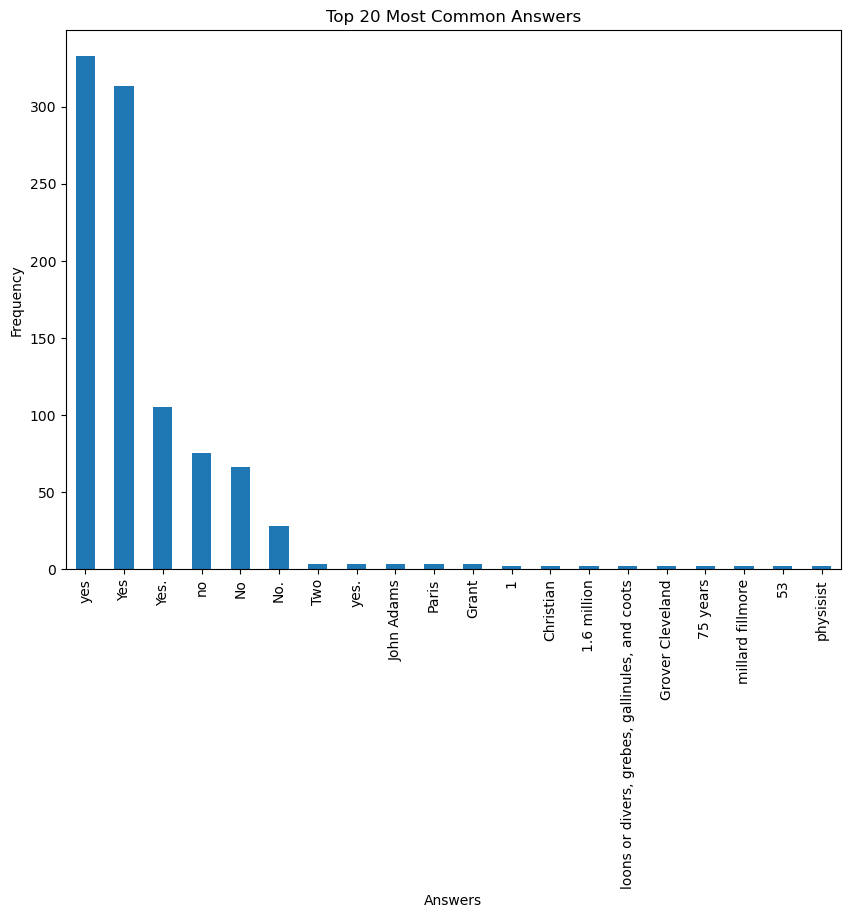

In [119]:

# Get the frequency count of each answer
answer_counts = all_data['Answer'].value_counts()

# Plot the frequency counts
plt.figure(figsize=(10,7))
answer_counts[:20].plot(kind='bar')
plt.title("Top 20 Most Common Answers")
plt.xlabel("Answers")
plt.ylabel("Frequency")
plt.show()


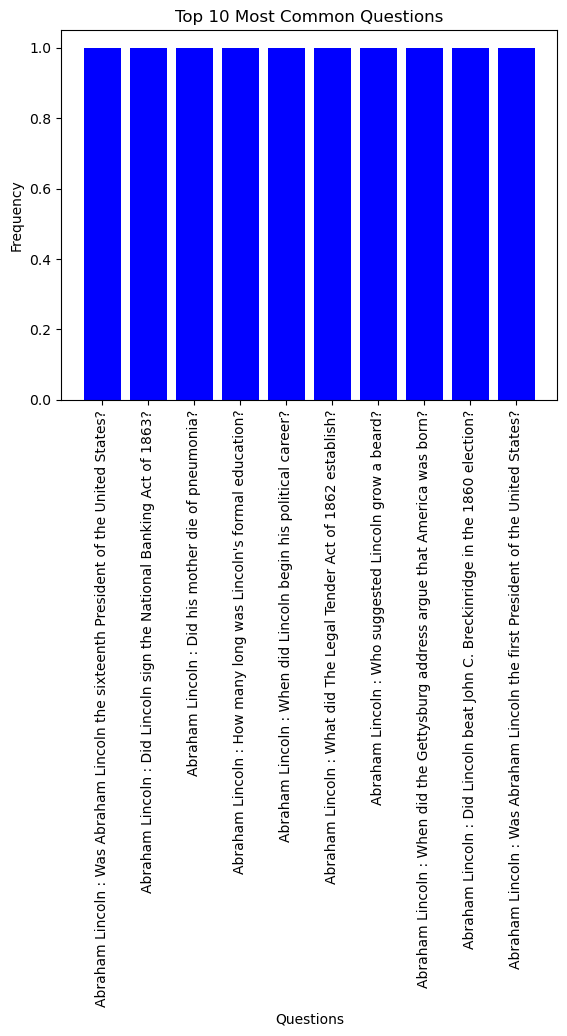

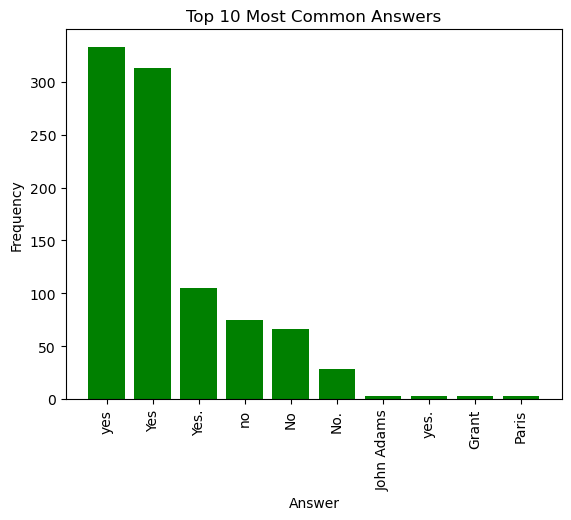

In [120]:
import collections
# Count the occurrences of each question
question_counts = collections.Counter(all_data['Question'])
# Get the top 10 most frequent questions
top_questions = question_counts.most_common(10)

# Count the occurrences of each answer
answer_counts = collections.Counter(all_data['Answer'])
# Get the top 10 most frequent answers
top_answers = answer_counts.most_common(10)

# Plot the top 10 most frequent questions as a bar chart
plt.bar([q[0] for q in top_questions], [q[1] for q in top_questions], color='b')
plt.xticks(rotation=90)
plt.title('Top 10 Most Common Questions')
plt.xlabel('Questions')
plt.ylabel('Frequency')
plt.show()

# Plot the top 10 most frequent answers as a bar chart
plt.bar([a[0] for a in top_answers], [a[1] for a in top_answers], color='g')
plt.xticks(rotation=90)
plt.title('Top 10 Most Common Answers')
plt.xlabel('Answer')
plt.ylabel('Frequency')
plt.show()


## frequencies and statistical model of language

In [121]:
# Import the list of stopwords from the nltk package for English language
stopwords_list = stopwords.words('english')

# Create a WordNetLemmatizer object
lemmatizer = WordNetLemmatizer()

# Define a function that takes a document as input and performs tokenization, part-of-speech tagging,
# removal of stopwords and punctuation, and lemmatization
def my_tokenizer(doc):
    # Tokenize the document using the word_tokenize() function from the nltk package
    words = word_tokenize(doc)
    
    # Perform part-of-speech tagging on the tokens using the pos_tag() function from the nltk package
    pos_tags = pos_tag(words)
    
    # Remove the stopwords from the list of pos-tagged tokens using a list comprehension
    non_stopwords = [w for w in pos_tags if not w[0].lower() in stopwords_list]
    
    # Remove the punctuation from the list of non-stopwords using another list comprehension
    non_punctuation = [w for w in non_stopwords if not w[0] in string.punctuation]
    
    # Lemmatize each token in the list of non-punctuation words based on its part of speech tag
    # using a for loop and the lemmatize() function from the WordNetLemmatizer object
    lemmas = []
    for w in non_punctuation:      
        if w[1].startswith('J'):  # check if the word is an adjective (start with 'J' in part-of-speech tag)
            pos = wordnet.ADJ    # if so, set the part-of-speech tag to adjective
        elif w[1].startswith('V'):  # check if the word is a verb (start with 'V' in part-of-speech tag)
            pos = wordnet.VERB   # if so, set the part-of-speech tag to verb
        elif w[1].startswith('N'):  # check if the word is a noun (start with 'N' in part-of-speech tag)
            pos = wordnet.NOUN   # if so, set the part-of-speech tag to noun
        elif w[1].startswith('R'):  # check if the word is an adverb (start with 'R' in part-of-speech tag)
            pos = wordnet.ADV    # if so, set the part-of-speech tag to adverb
        else:                     # if the word is not an adjective, verb, noun, or adverb
            pos = wordnet.NOUN   # set the part-of-speech tag to noun (as a default)
        
        lemmas.append(lemmatizer.lemmatize(w[0], pos))   # apply lemmatization on the current word with its corresponding part-of-speech tag, and append the resulting lemma to the list of lemmas


    # Return the list of lemmas as the output of the function
    return lemmas


In [122]:
tfidf_vectorizer = TfidfVectorizer(tokenizer=my_tokenizer)

In [123]:
tfidf_matrix = tfidf_vectorizer.fit_transform(tuple(all_data['Question']))

In [124]:
print(tfidf_matrix.shape)

(2188, 3548)


## explication : 

 - Ces lignes de code utilisent la classe " TfidfVectorizer " de la bibliothèque scikit-learn pour créer une matrice de pondération de termes-idf (TF-IDF) pour toutes les questions contenues dans la colonne "Question" du DataFrame "all_data".
 
 - La fonction " my_tokenizer() "  est utilisée comme une fonction de tokenization personnalisée pour diviser chaque question en mots et effectuer un prétraitement pour retirer les stopwords, la ponctuation et effectuer une lemmatisation.
 
 - La matrice TF-IDF résultante est stockée dans " tfidf_matrix"  et chaque question est représentée par un vecteur dans cet espace de dimensionnalité réduite.

## visualization of tests and results

### method 1 , simple command line

### define a function to test with command line

1.here we define the function ask_question() with a string as an argument. This string represents the question you want to ask.

2.The function will use the TfidfVectorizer to transform the input question into a vector representation.

3.The function will then calculate the cosine similarity between the vector representation of the input question and all the vector representations of the questions in the corpus (all_data).

4.The function will find the question in the corpus with the highest cosine similarity to the input question.

5.The function will print the input question, the closest question found in the corpus, the similarity score between the input question and the closest question, and the answer to the closest question.

6.You can repeat this process with different input questions to see how well the function performs in finding the closest matching question and providing an appropriate answer.

In [130]:
def ask_question(question):
    # Transform the input question into a vector representation using the TF-IDF vectorizer.
    query_vect = tfidf_vectorizer.transform([question])
    
    # Calculate the cosine similarity between the input question and all the questions in the dataset.
    # This returns an array of similarity scores.
    similarity = cosine_similarity(query_vect, tfidf_matrix)
    
    # Find the index of the question in the dataset that has the highest similarity score to the input question.
    max_similarity = np.argmax(similarity, axis=None)
    
    # Print the input question, the closest question in the dataset, the similarity score, and the answer to the closest question.
    print('Your question:', question)
    print('Closest question found in the Article :', all_data.iloc[max_similarity]['Question'])
    print('Similarity: {:.2%}'.format(similarity[0, max_similarity]))
    print('Answer:', all_data.iloc[max_similarity]['Answer'])


In [131]:
ask_question('When Abraham Lincoln started his political career')

Your question: When Abraham Lincoln started his political career
Closest question found in the Article : Abraham Lincoln : Did Lincoln start his political career in 1832?
Similarity: 88.14%
Answer: Yes


In [132]:
ask_question("Which county was Lincoln born in")

Your question: Which county was Lincoln born in
Closest question found in the Article : Abraham Lincoln : Which county was Lincoln born in?
Similarity: 88.64%
Answer: Hardin County


In [133]:
ask_question(' what is ottawa ?')

Your question:  what is ottawa ?
Closest question found in the Article : Ottawa : Is Ottawa on a river?
Similarity: 87.53%
Answer: yes


In [134]:
ask_question('are nicola tesla born in tunisia ? ')

Your question: are nicola tesla born in tunisia ? 
Closest question found in the Article : Nikola Tesla : Was Tesla born in the United States?
Similarity: 74.10%
Answer: No


In [135]:
ask_question('Alessandro Volta, is a professor of chemistry?')

Your question: Alessandro Volta, is a professor of chemistry?
Closest question found in the Article : Alessandro Volta : Was Alessandro Volta a professor of chemistry?
Similarity: 94.30%
Answer: Alessandro Volta was not a professor of chemistry.


### method 2 : we use the same function but we test with GUI from gradio

In [141]:
import gradio as gr # Import the Gradio library for creating the user interface.

def ask_question(question):
    
    query_vect = tfidf_vectorizer.transform([question])
    
    similarity = cosine_similarity(query_vect, tfidf_matrix)
    
    max_similarity = np.argmax(similarity, axis=None)
    
    closest_question = all_data.iloc[max_similarity]['Question']
    similarity_score = similarity[0, max_similarity]
    answer = all_data.iloc[max_similarity]['Answer']
    
    return f"Closest question found in the Article: {closest_question}\nSimilarity: {similarity_score:.2%}\nAnswer: {answer}"

iface = gr.Interface(fn=ask_question, inputs="text", outputs="text", title="Question Answering System by imhamed boujemaa", description="Enter a question to find the closest question in the given article and its answer.")

iface.launch()


Running on local URL:  http://127.0.0.1:7863

To create a public link, set `share=True` in `launch()`.
